Задание 1: построить двумерные диаграммы рассеяния с раскраской по классам

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('lw_data.csv', sep='\t', encoding='cp1251', index_col=0)
data

,Класс,x1,x2,x3,x4
0,1,"0,377253402","2,534023737","1,52795192","1,617931039"
1,2,"0,862492689","4,088941033","0,726923409","1,78907599"
2,1,"2,347880884","-3,51560521","1,907470398","-0,021224569"
3,1,"0,633584232","-4,042075612","0,842389743","-0,193014623"
4,2,"4,785622418","-2,154030293","0,699526759","0,906914264"
...,...,...,...,...,...
195,2,"4,908168895","-7,69056496","0,886984102","-0,36175537"
196,2,"4,636357729","-2,482247622","0,174237536","1,807312682"
197,1,"0,381155471","-1,454509832","-0,033820681","0,879738521"
198,2,"3,062709369","-3,652407334","-0,311299762","1,392013319"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Класс   200 non-null    int64 
 1   x1      200 non-null    object
 2   x2      200 non-null    object
 3   x3      200 non-null    object
 4   x4      200 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.4+ KB


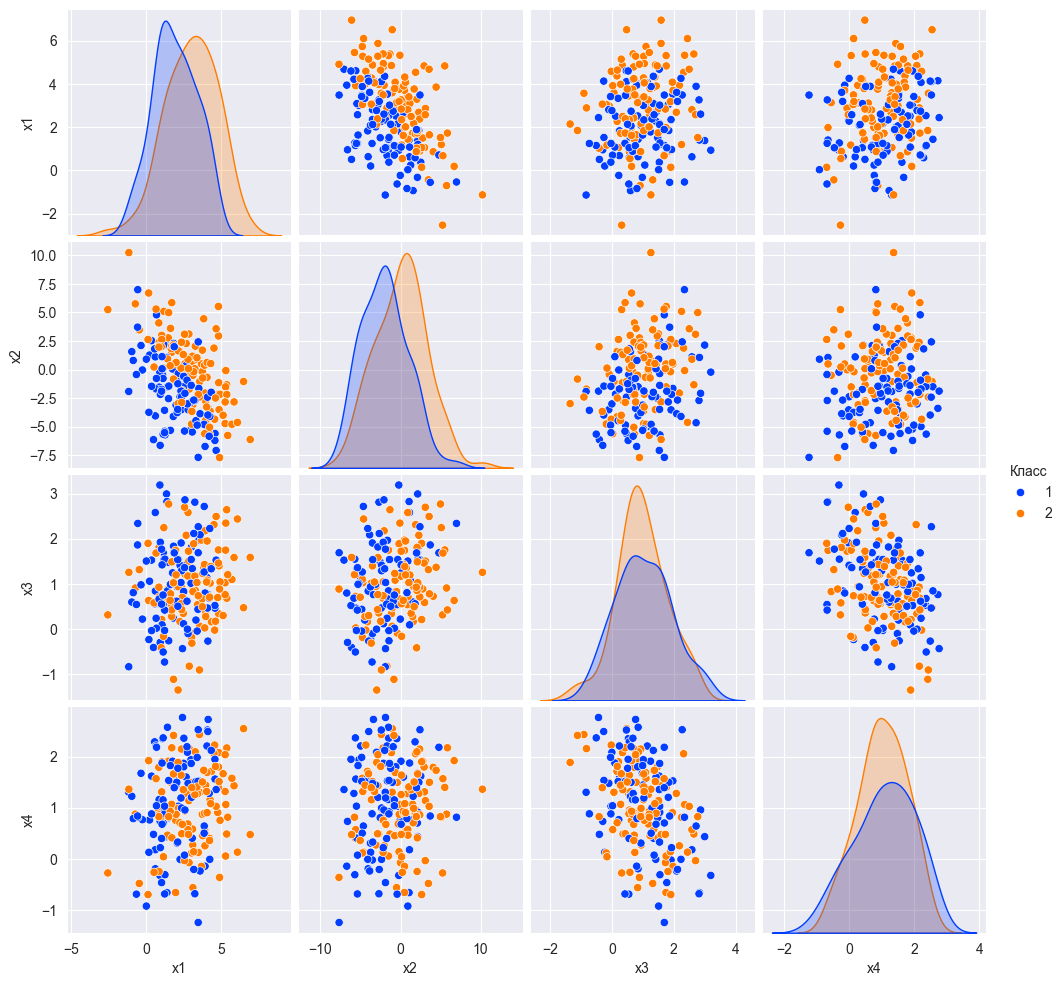

In [5]:
data['x1'] = data['x1'].apply(lambda x: float(x.replace(',', '.')))
data['x2'] = data['x2'].apply(lambda x: float(x.replace(',', '.')))
data['x3'] = data['x3'].apply(lambda x: float(x.replace(',', '.')))
data['x4'] = data['x4'].apply(lambda x: float(x.replace(',', '.')))
sns.set_style('darkgrid')
sns.pairplot(data, hue='Класс', palette='bright')

Задание 3: построить график зависимости доли объясненной дисперсии от номера главной
компоненты

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
sc = StandardScaler()
sc.fit(data)
data_st = pd.DataFrame(sc.transform(data), index=data.index, columns=data.columns)
data_st['Класс'] = data['Класс']
data_st

,Класс,x1,x2,x3,x4
0,1,-1.268933,1.070614,0.623627,0.680596
1,2,-0.981928,1.554143,-0.314040,0.882931
2,1,-0.103363,-0.810626,1.067883,-1.257290
3,1,-1.117321,-0.974342,-0.178877,-1.460388
4,2,1.338492,-0.387220,-0.346110,-0.160001
...,...,...,...,...,...
195,2,1.410975,-2.108905,-0.126676,-1.659881
196,2,1.250206,-0.489285,-0.961002,0.904492
197,1,-1.266625,-0.169692,-1.204550,-0.192129
198,2,0.319438,-0.853168,-1.529361,0.413505


In [8]:
cov_mat = np.cov(data_st.T)
u,s,v = np.linalg.svd(cov_mat)
u,s,v

(array([[ 0.00492173,  0.01307652, -0.20310244, -0.66923379,  0.714619  ],
        [-0.54062512,  0.46591183, -0.48806037, -0.28707297, -0.41235523],
        [ 0.59943761, -0.37069703, -0.48469388, -0.3037758 , -0.41958356],
        [ 0.43592923,  0.58084596, -0.43409857,  0.45052362,  0.28490452],
        [-0.39792023, -0.5549386 , -0.5451392 ,  0.41768885,  0.24912227]]),
 array([1.55234855, 1.32376856, 0.92849767, 0.41567898, 0.05015849]),
 array([[ 0.00492173, -0.54062512,  0.59943761,  0.43592923, -0.39792023],
        [ 0.01307652,  0.46591183, -0.37069703,  0.58084596, -0.5549386 ],
        [-0.20310244, -0.48806037, -0.48469388, -0.43409857, -0.5451392 ],
        [-0.66923379, -0.28707297, -0.3037758 ,  0.45052362,  0.41768885],
        [ 0.714619  , -0.41235523, -0.41958356,  0.28490452,  0.24912227]]))

In [11]:
mean_vec = np.mean(data_st, axis=0)
mean_vec

Класс    1.530000e+00
x1       5.329071e-17
x2      -2.220446e-17
x3      -3.552714e-17
x4      -5.995204e-17
dtype: float64

In [13]:
cov_mat = (data_st - mean_vec).T.dot((data_st - mean_vec)) / (data_st.shape[0] - 1)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)  # собственные значения и собственные векторы
u, s, v = np.linalg.svd(cov_mat)
u, s, v

(array([[ 0.00492173,  0.01307652, -0.20310244, -0.66923379,  0.714619  ],
        [-0.54062512,  0.46591183, -0.48806037, -0.28707297, -0.41235523],
        [ 0.59943761, -0.37069703, -0.48469388, -0.3037758 , -0.41958356],
        [ 0.43592923,  0.58084596, -0.43409857,  0.45052362,  0.28490452],
        [-0.39792023, -0.5549386 , -0.5451392 ,  0.41768885,  0.24912227]]),
 array([1.55234855, 1.32376856, 0.92849767, 0.41567898, 0.05015849]),
 array([[ 0.00492173, -0.54062512,  0.59943761,  0.43592923, -0.39792023],
        [ 0.01307652,  0.46591183, -0.37069703,  0.58084596, -0.5549386 ],
        [-0.20310244, -0.48806037, -0.48469388, -0.43409857, -0.5451392 ],
        [-0.66923379, -0.28707297, -0.3037758 ,  0.45052362,  0.41768885],
        [ 0.714619  , -0.41235523, -0.41958356,  0.28490452,  0.24912227]]))

In [14]:
# Значения объясненной дисперсии для каждой главной компоненты
skpcamod = PCA().fit(X=data_st)
skpcamod.explained_variance_

array([1.55234855, 1.32376856, 0.92849767, 0.41567898, 0.05015849])

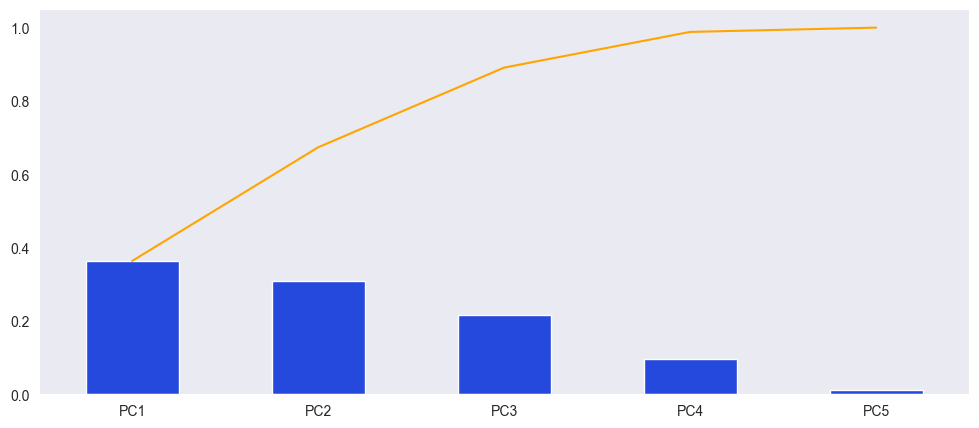

In [28]:
pd.Series(s/s.sum(), index=[f'PC{x+1}' for x in range(data_st.shape[1])]).plot.bar(
    color='#2549dd',
    figsize=(12, 5)
)
pd.Series((s/s.sum()).cumsum(), index=[f'PC{x+1}' for x in range(data_st.shape[1])]).plot(
    color='orange'
)
plt.grid()

Задание 2: построить диаграммы рассеяния в координатах главных компонент с раскраской по
классам

In [33]:
print(s)
np.where(s > s.mean())[0]

[1.55234855 1.32376856 0.92849767 0.41567898 0.05015849]


array([0, 1, 2])

Таким образом, выбираем ГК1, ГК2 и ГК3

In [36]:
# scores_svd = pd.DataFrame(data_st @ u[:,:2])
# scores_svd.columns = ['PC1','PC2']
# sns.scatterplot(x=scores_svd['PC1'], y=scores_svd['PC2'], hue=data_st['Класс'], palette='bright')

In [34]:
ixs = np.argsort(eig_vals)[::-1]
scores_eig = pd.DataFrame(data_st @ eig_vecs[:,ixs][:,:2])
# трансформируем исходную матрицу данных X в матрицу счетов PC1-2
scores_svd = pd.DataFrame(data_st @ u[:,:2])
# трансформируем исходную матрицу данных X в матрицу счетов PC1-2
scores_skl = pd.DataFrame(skpcamod.transform(data_st)[:,:2]) # с помощью sklearn
scores_svd.columns = ['PC1', 'PC2']
scores_eig.columns = ['PC1', 'PC2']
scores_skl.columns = ['PC1', 'PC2']

Text(0.5, 1.0, 'With sklearn PCA')

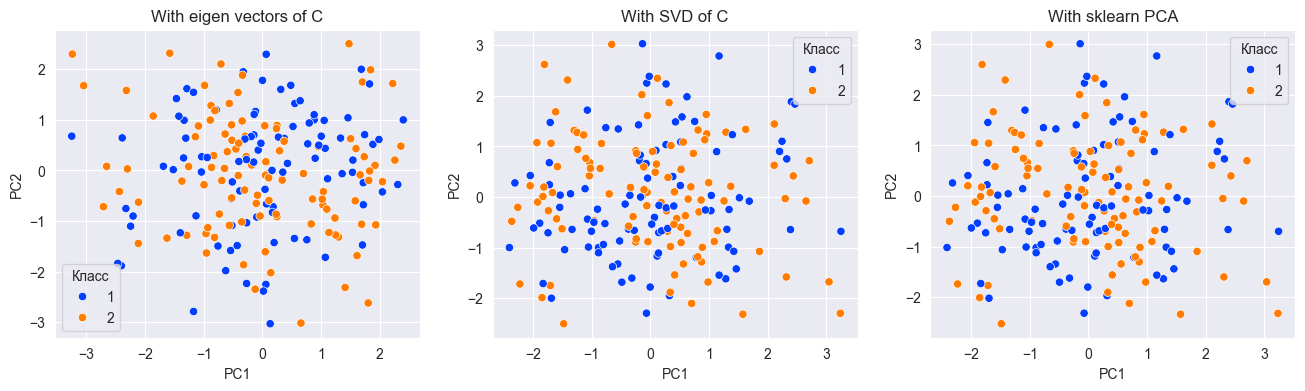

In [37]:
_ , axes = plt.subplots(ncols=3, nrows=1, figsize = (16, 4))
sns.scatterplot(x='PC1', y='PC2', data=scores_eig, hue=data_st['Класс'], palette='bright', ax=axes[0])
sns.scatterplot(x='PC1', y='PC2', data=scores_svd, hue=data_st['Класс'], palette='bright', ax=axes[1])
sns.scatterplot(x='PC1', y='PC2', data=scores_skl, hue=data_st['Класс'], palette='bright', ax=axes[2])
axes[0].set_title('With eigen vectors of C')
axes[1].set_title('With SVD of C')
axes[2].set_title('With sklearn PCA')